# TD2 part 1
Dans ce TD, nous allons construire un RNN from scratch avec Pytorch, en suivant les étapes suivantes:

- Sur un problème non-linéaire, nous allons construire un multi-layers perceptron
- Sur un problème de texte, nous utiliserons pytorch pour optimiser un RNN


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Problème simple

## Données exemples
Nous allons construire des données $y = \beta^* X + b$


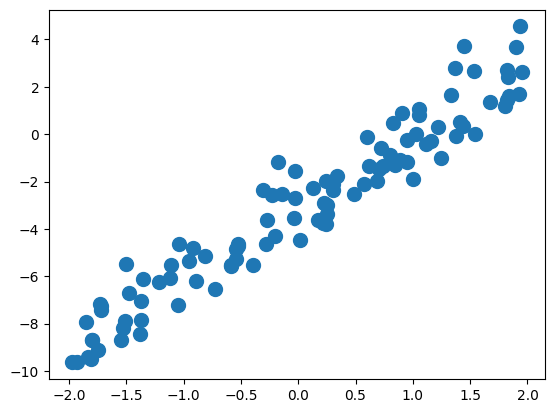

In [27]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * x + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

### Constuire l'optimizer

- Avec torch.nn.Parameter(), créer le paramètre beta qui sera optimisé. Les predictions du modèle sont égales à $\beta \times X$ 
- Avec torch.nn.MSELoss, déclarer la loss entre les prédictions et le résultat réel. loss.backward() pour mettre à jour les gradients
- Avec torch.optim.Adam, déclarer un optimizer
- Construisez la boucle qui, pour n_epochs, va reset les gradients, calculer la loss, mettre à jour les gradients et faire un pas pour optimiser beta

In [28]:
xvec = torch.tensor(xvec, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

beta = torch.nn.Parameter(torch.tensor(a_star * xvec, dtype=torch.float32))

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam([beta], lr=0.01)
epochs = 10000

for epoch in range(epochs):
    optimizer.zero_grad()
    y_hat = beta * xvec
    loss_val = loss_fn(y_hat, y)
    loss_val.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss {loss_val.item()}')

/var/folders/0y/bq5wmv_170n6dpdj22z923xr0000gn/T/ipykernel_42106/1212349103.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xvec = torch.tensor(xvec, dtype=torch.float32)
/var/folders/0y/bq5wmv_170n6dpdj22z923xr0000gn/T/ipykernel_42106/1212349103.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.nn.Parameter(torch.tensor(a_star * xvec, dtype=torch.float32))


Epoch 0, loss 78.22388458251953
Epoch 100, loss 61.228858947753906
Epoch 200, loss 47.7132453918457
Epoch 300, loss 37.0336799621582
Epoch 400, loss 28.606233596801758
Epoch 500, loss 21.96011734008789
Epoch 600, loss 16.7264347076416
Epoch 700, loss 12.620980262756348
Epoch 800, loss 9.424117088317871
Epoch 900, loss 6.9619011878967285
Epoch 1000, loss 5.092004776000977
Epoch 1100, loss 3.695034980773926
Epoch 1200, loss 2.669943332672119
Epoch 1300, loss 1.9317213296890259
Epoch 1400, loss 1.4100408554077148
Epoch 1500, loss 1.0480449199676514
Epoch 1600, loss 0.8009774088859558
Epoch 1700, loss 0.6346077919006348
Epoch 1800, loss 0.5235328078269958
Epoch 1900, loss 0.44946956634521484
Epoch 2000, loss 0.39966049790382385
Epoch 2100, loss 0.3654733896255493
Epoch 2200, loss 0.34123557806015015
Epoch 2300, loss 0.3233187794685364
Epoch 2400, loss 0.3094538152217865
Epoch 2500, loss 0.2982431948184967
Epoch 2600, loss 0.2888300120830536
Epoch 2700, loss 0.28068360686302185
Epoch 2800, 

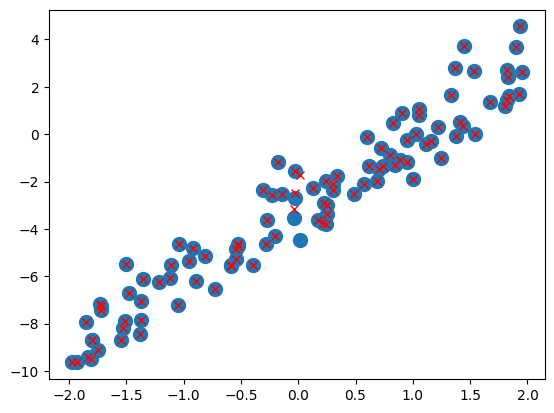

In [29]:
# Plot des predictions
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, (beta * x).detach().numpy(), 'rx')

# Multi-layers perceptron

## Données exemples

Ici, on a un modèle $y = ax² + b$

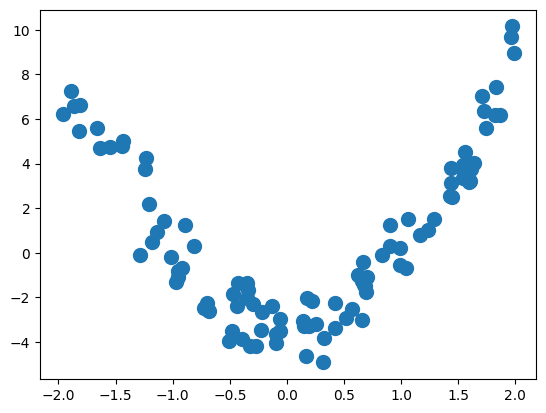

In [30]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * (x ** 2) + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

Nous allons construire un Pytorch modèle. Dans ce framework, on définit la fonction "forward" qui prend en argument les inputs et retourne les prédictions.

A l'aide de torch.nn.Module et de différentes layers (torch.nn.Linear, torch.nn.ReLU), terminez la classe ci-dessous pour créer un multi-layers perceptron

In [31]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, layer_2_size, layer_3_size, layer_4_size):
        super(MLP, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, layer_2_size)
        self.layer2 = torch.nn.Linear(layer_2_size, layer_3_size)
        self.layer3 = torch.nn.Linear(layer_3_size, layer_4_size)
        self.layer4 = torch.nn.Linear(layer_4_size, 1)

    def forward(self, X):
        X = self.layer1(X)
        X = torch.nn.functional.relu(X)
        X = self.layer2(X)
        X = torch.nn.functional.relu(X)
        X = self.layer3(X)
        X = torch.nn.functional.relu(X)
        X = self.layer4(X)
        return X

En utilisant le travail précédent, faite une cellule utilisant un torch optimizer pour optimiser le MLP

In [32]:
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

input_size = 1
layer_2_size = 50
layer_3_size = 30
layer_4_size = 20
model = MLP(input_size, layer_2_size, layer_3_size, layer_4_size)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 50001

for epoch in range(epochs):
    optimizer.zero_grad()
    y_hat = model(xvec)
    loss_val = loss_function(y_hat, y)
    loss_val.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss {loss_val.item()}')

Epoch 0, loss 14.637102127075195
Epoch 100, loss 0.7975350022315979
Epoch 200, loss 0.7547024488449097
Epoch 300, loss 0.7377321720123291
Epoch 400, loss 0.7256458401679993
Epoch 500, loss 0.7116405367851257
Epoch 600, loss 0.699413001537323
Epoch 700, loss 0.7018119096755981
Epoch 800, loss 0.685096025466919
Epoch 900, loss 0.6753997802734375
Epoch 1000, loss 0.6849886178970337
Epoch 1100, loss 0.7068718075752258
Epoch 1200, loss 0.669034481048584
Epoch 1300, loss 0.647034227848053
Epoch 1400, loss 0.6384362578392029
Epoch 1500, loss 0.6296849846839905
Epoch 1600, loss 0.6491950750350952
Epoch 1700, loss 0.6284317374229431
Epoch 1800, loss 0.6204257011413574
Epoch 1900, loss 0.6022818088531494
Epoch 2000, loss 0.5965537428855896
Epoch 2100, loss 0.5881038904190063
Epoch 2200, loss 0.5835198163986206
Epoch 2300, loss 0.5785377025604248
Epoch 2400, loss 0.5921800136566162
Epoch 2500, loss 0.5928270816802979
Epoch 2600, loss 0.5792928338050842
Epoch 2700, loss 0.5972394347190857
Epoch 28

# Problème de texte

On a des données prénom -> pays d'origine.
On veut utiliser un réseau de neurones qui, pour un nom, va prédire le pays d'origine en utilisant la suite de caractères.

## Extraction des données

Vous trouverez [ici](https://download.pytorch.org/tutorial/data.zip) un zip avec des fichiers \[nationalité\].txt contenant des prénoms pour chaque nationalité. <br/>
Nous allons avoir un jeu de données pays -> prénoms.

In [33]:
# Code pour générer le jeu de données
# En admettant que les fichiers ont été extraits dans data/raw/names/

import math
import random
import string
import unicodedata
from pathlib import Path

import numpy as np

path = Path("./data/names/")

In [34]:
def read_names(path):
    country_to_names = {}
    for file in path.iterdir():
        if not file.name.endswith(".txt"):
            continue

        with open(file) as f:
            names = [unicodeToAscii(line.strip()) for line in f]

        country = file.stem
        country_to_names[country] = names

    return country_to_names

# Handling ASCII stuff
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [35]:
country_to_names = read_names(path)


## Transformation des prénoms en features

On va one-hot encode les lettres des prénoms. <br/>
Si on utilisait "a" ayant comme indice 0, "b" indice 1, ... "z" indice 25, <br/>
le prénom "abby" aurait les index suivants [0, 1, 1, 24], <br/>
ou la matrice: <br/>
[ <br/>
    \[1, 0, ..., 0, 0\] <br/>
    \[0, 1, ..., 0, 0\] <br/>
    \[0, 1, ..., 0, 0\] <br/>
    \[0, 0, ..., 1, 0\] <br/>
] <br/>

Dans les prénoms, nous avons des caractères spéciaux (comme "ö", "é", etc), donc nous utiliserons la table ASCII pour traduire les lettres en indice

In [36]:
def get_encoded_matrix():
    encoded_matrix = {char: ord(char) for char in all_letters}
    return encoded_matrix

def get_encoded_word(word, encoded_matrix):
    return [encoded_matrix[char] for char in word]

print(get_encoded_word("Abby", get_encoded_matrix()))

[65, 98, 98, 121]


## Jouons un peu avec les RNN

Le RNN (Recurrent neural network) est prévu pour prendre une série d'inputs et prédire un output.

In [37]:
# La table ascii a 128 caractères, une lettre one-hot encodée est donc un vecteur de taille 128
# Les inputs seront de tailles 128
model = torch.nn.RNN(input_size=128, hidden_size=1)
# Hidden_size est la dimension de l'output

In [38]:
# La lettre "a" est l'indice 97 dans la table ascii
letter_a = torch.zeros((1, 128))
letter_a[0][97] = 1

output, hidden = model(letter_a)
output

tensor([[-0.9471]], grad_fn=<SqueezeBackward1>)

In [39]:
# Le prénom "Abby" est une suite de 4 lettres# La lettre "a" est l'indice 97 dans la table ascii
name_abby = torch.zeros((1, 4, 128))
name_abby[0][0][97] = 1
name_abby[0][1][98] = 1
name_abby[0][2][98] = 1
name_abby[0][2][121] = 1

output, hidden = model(name_abby)
# On a un output pour chaque lettre. On considère que l'output de la dernière lettre est la nationalité à trouver
output

tensor([[[-0.9471],
         [-0.8383],
         [-0.4160],
         [-0.8681]]], grad_fn=<StackBackward0>)

## Un RNN et une loss pour notre dataset
Nous avons un problème de classification, nous allons utiliser la cross-entropy loss.

Dans notre problème, nous avons 18 classes différentes (18 nationalités).
Pour un prénom, notre réseau de neurones devra sortir la probabilité que le nom appartienne à chaque pays (un vecteur de taille 18, dont la somme fait 1).

Notre réseau aura donc un output de taille 18, et nous appliquerons la fonction softmax pour en faire des probabilités (la somme des 18 outputs fera 1). <br/>
Fonction softmax:

$ \sigma(x)_i = \frac{e^{x_i}}{\sum_{j=0}^{K} e^{x_j}} $

In [40]:
model = torch.nn.RNN(input_size=128, hidden_size=18)
loss = torch.nn.CrossEntropyLoss()

In [41]:
output, hidden = model(name_abby)

output.shape

torch.Size([1, 4, 18])

In [42]:
# Shape est 1 (un prénom), 4 (4 lettres), 18 (une valeur pour chacune des nationalités)

# On utilise l'output de la dernière lettre
output = output[:, -1, :]

proba = torch.nn.functional.softmax(output)
proba

/var/folders/0y/bq5wmv_170n6dpdj22z923xr0000gn/T/ipykernel_42106/668213069.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  proba = torch.nn.functional.softmax(output)


tensor([[0.0554, 0.0478, 0.0780, 0.0400, 0.0438, 0.0600, 0.0660, 0.0548, 0.0488,
         0.0567, 0.0703, 0.0577, 0.0571, 0.0428, 0.0692, 0.0538, 0.0491, 0.0487]],
       grad_fn=<SoftmaxBackward0>)

In [43]:
# Pour différents label (nationalité du prénom "Abby"), on a différentes cross-entropy loss
y = torch.zeros((1))
y = y.type(torch.LongTensor)
y[0] = 1

loss(proba, y)

tensor(2.8982, grad_fn=<NllLossBackward0>)

In [44]:
y[0] = 13

loss(proba, y)


tensor(2.9032, grad_fn=<NllLossBackward0>)

# Votre tour

Maintenant que nous avons des données, un modèle et une loss:
- Séparez vos données en train & test
- Faites une loop tirant au hasard des noms avec leur nationalité, calculez la sortie du réseau de neurones, sa loss, le gradient, et faites un step pour l'optimiser
- Une fois que vous avez un modèle qui marche, testez d'autres architectures de réseaux de neurones pour avoir le meilleur résultat.

In [45]:
# print dataset
print(
    country_to_names.keys()
)  # -> dict_keys(['Czech', 'German', 'Arabic', 'Japanese', 'Chinese', 'Vietnamese', 'Russian', 'French', 'Irish', 'English', 'Spanish', 'Greek', 'Italian', 'Portuguese', 'Scottish', 'Dutch', 'Korean', 'Polish'])
print(
    country_to_names["French"][:5]
)  # -> ['Abel', 'Abraham', 'Adam', 'Albert', 'Allard']

dict_keys(['Czech', 'German', 'Arabic', 'Japanese', 'Chinese', 'Vietnamese', 'Russian', 'French', 'Irish', 'English', 'Spanish', 'Greek', 'Italian', 'Portuguese', 'Scottish', 'Dutch', 'Korean', 'Polish'])
['Abel', 'Abraham', 'Adam', 'Albert', 'Allard']


In [46]:
def split_dataset(country_to_names={}, train_ratio=0.8):
    train_set = {}
    test_set = {}
    for country, names in country_to_names.items():
        random.shuffle(names)
        train_size = math.floor(len(names) * train_ratio)
        train_set[country] = names[:train_size]
        test_set[country] = names[train_size:]
    return train_set, test_set

In [47]:
train_set, test_set = split_dataset(country_to_names)
print(len(train_set["French"]))  # -> 221
print(len(test_set["French"]))  # -> 56

221
56


In [51]:
# Split the dataset into training and testing sets
train_set, test_set = split_dataset(country_to_names)

# Define the RNN model
class RNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = torch.nn.RNN(input_size, hidden_size)
        self.fc = torch.nn.Linear(hidden_size, output_size)

    def forward(self, X):
        _, hidden = self.rnn(X)
        output = self.fc(hidden)
        return output, hidden

# Initialize the model, loss function, and optimizer
model = RNN(input_size=128, hidden_size=18, output_size=len(train_set.keys()))
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Function to get a random training example
def random_training_example(train_set):
    country = random.choice(list(train_set.keys()))
    name = random.choice(train_set[country])
    country_tensor = torch.tensor([list(train_set.keys()).index(country)], dtype=torch.long)
    name_tensor = name_to_tensor(name)
    return country, name, country_tensor, name_tensor

# Function to convert a name to a tensor
def name_to_tensor(name):
    tensor = torch.zeros(len(name), 1, 128)
    for li, letter in enumerate(name):
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# Training loop
n_iters = 10000
plot_every = 100
all_losses = []
current_loss = 0
correct_count = 0

for iter in range(1, n_iters + 1):
    country, name, country_tensor, name_tensor = random_training_example(train_set)

    output, hidden = model(name_tensor)
    output = output[-1]
    loss = loss_function(output, country_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    current_loss += loss.item()

    guess = list(train_set.keys())[output.argmax().item()]
    correct = "✓" if guess == country else "✗ (%s)" % country
    if guess == country:
        correct_count += 1
    print(f"{iter} {iter / n_iters * 100:.2f}% {loss.item():.4f} {name} / {guess} {correct}")

    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

# Calculate accuracy
accuracy = correct_count / n_iters * 100
print(f"Accuracy: {accuracy:.4f}%")

1 0.01% 3.0349 Rang / Russian ✗ (Chinese)
2 0.02% 2.7053 Meisner / Korean ✗ (Dutch)
3 0.03% 2.8987 Maas / Scottish ✗ (Dutch)
4 0.04% 2.8398 Lecuyer / Dutch ✗ (French)
5 0.05% 2.7510 Piontek / Dutch ✗ (Polish)
6 0.06% 2.6147 Jones / Dutch ✗ (Scottish)
7 0.07% 2.8473 Gensai / Dutch ✗ (Japanese)
8 0.08% 3.1728 Almasi / Polish ✗ (Arabic)
9 0.09% 3.2856 Ramos / Dutch ✗ (Spanish)
10 0.10% 2.7493 You / Dutch ✗ (Korean)
11 0.11% 2.6207 Bukoski / Dutch ✗ (Polish)
12 0.12% 2.4491 Venn / Dutch ✓
13 0.13% 2.8370 Alkvist / Polish ✗ (Russian)
14 0.14% 3.0462 D'cruze / Dutch ✗ (Portuguese)
15 0.15% 2.6587 Shao / Dutch ✗ (Chinese)
16 0.16% 2.2930 Xiang / Dutch ✗ (Chinese)
17 0.17% 3.1782 Heather / Dutch ✗ (English)
18 0.18% 2.4494 Bosko / Dutch ✗ (Polish)
19 0.19% 2.0162 Zhang / Chinese ✓
20 0.20% 3.6608 Stark / Chinese ✗ (German)
21 0.21% 3.4413 Werlla / Dutch ✗ (Czech)
22 0.22% 2.7959 Forest / Polish ✗ (French)
23 0.23% 2.6327 Yoemon / Dutch ✗ (Japanese)
24 0.24% 2.9910 Salazar / Dutch ✗ (Portuguese